In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import functions as f
import easygui as gui
import ipywidgets as widgets
from skimage.feature import peak_local_max
from scipy import ndimage
get_ipython().run_line_magic('matplotlib', 'notebook')
#%matplotlib widget

files = gui.fileopenbox(default='/media/erick/NuevoVol/LINUX_LAP/PhD/Thesis/Results/', multiple=True)

path = [[],[]]
if files[0].find('MED') != -1:
    path[0] = files[1]
    path[1] = files[0]
else:
    path = files

In [2]:
path

['C:\\Users\\eers500\\Documents\\PhD\\E_coli\\June2021\\14\\sample_2\\NEW ANALYSIS\\40x_HCB1_60Hz_1.7us_10_700frames-1-1.png',
 'C:\\Users\\eers500\\Documents\\PhD\\E_coli\\June2021\\14\\sample_2\\NEW ANALYSIS\\MED_40x_HCB1_60Hz_1.7us_10_700frames-1-1.png']

In [3]:
I = mpimg.imread(path[0])
I_MEDIAN = mpimg.imread(path[1])
#I_MEDIAN = np.ones((np.shape(I)[0], np.shape(I)[1]))

#I = vid[:,:,0]
#I_MEDIAN = f.medianImage(vid, 100)
#I_MEDIAN[I_MEDIAN == 0] = np.mean(I_MEDIAN)

N = 1.3226
LAMBDA = 0.642               # Diode
MPP = 40                      # Magnification: 10x, 20x, 50x, etc
FS = 0.711*(MPP/10)                     # Sampling Frequency px/um
NI = np.shape(I)[0]
NJ = np.shape(I)[1]
SZ = 5                       # Step size in um
NUMSTEPS = 50

#RS = f.rayleighSommerfeldPropagator(I, I_MEDIAN, N, LAMBDA, FS, SZ, NUMSTEPS, True, True)
#GS = f.zGradientStack(RS)

GS = f.modified_propagator(I, I_MEDIAN, N, LAMBDA, FS, SZ, NUMSTEPS, True, True)

In [4]:
_, BINS = np.histogram(GS.flatten(), bins=100)
np.min(GS)

-24527.025

In [5]:
GS.shape

(700, 700, 50)

In [6]:
#RS = f.rayleighSommerfeldPropagator(I, I_MEDIAN, N, LAMBDA, FS, SZ, NUMSTEPS, True, True)
#RS = RS / RS.max()

#f.exportAVI('/media/erick/NuevoVol/LINUX_LAP/PhD/Thesis/Results/1/Bdellovibrio+Ecoli/frame0_RS.avi', RS, 512, 512, 3)

In [7]:
np.max(GS)

22178.584

In [8]:
step = BINS[2] - BINS[1]
step

467.0547

<IPython.core.display.Javascript object>


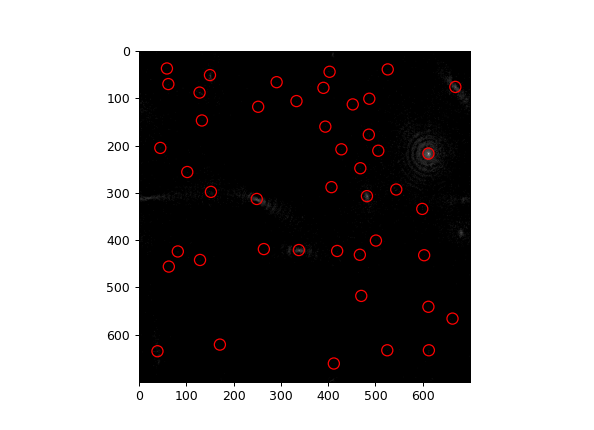

interactive(children=(FloatSlider(value=-24527.025390625, description='threshold', max=22178.583984375, min=-2…

In [9]:
# set up plot
fig, ax = plt.subplots(figsize=(6, 4)) 
 
@widgets.interact(threshold=(BINS[0], BINS[-1], step/2), peak_min_dist=(0, 50, 5), show_scatter = False)
def update(threshold=BINS[0], peak_min_dist=30, show_scatter=True):
    GSS = np.copy(GS)
    GSS[GS < threshold] = 0
    ZP = np.max(GSS, axis=-1)
    PKS = peak_local_max(ZP, min_distance=peak_min_dist)
    ax.clear()
    ax.imshow(ZP, cmap='gray')
    if show_scatter==True:
        ax.scatter(PKS[:,1], PKS[:,0], marker='o', facecolors='none', s=80, edgecolors='r')


<IPython.core.display.Javascript object>


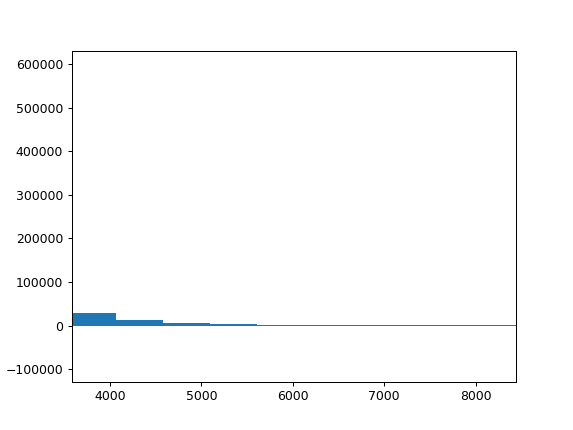

In [9]:
plt.figure(2)
plt.hist(GS.flatten(), bins=100)
plt.show()